# Stochastic Simulation -- Asignment 1
## Walter Vianen -- 11811293
## Daan van Ingen -- 10345078

In [1]:
# Import packages
from matplotlib import pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from numba import jit
from tqdm import tqdm
import numpy as np
import pandas as pd
import math
import itertools
import random

In [2]:
MAXITER = 300
CMAP = 'gnuplot2'
DPI = 300

In [3]:
# Functions needed to compute the Mandelbrot set (adapted from https://gist.github.com/jfpuget/60e07a82dece69b011bb)
@jit
def mandelbrot(c, maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 3:
            return n
        z = z*z + c
    return 0

@jit
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j], maxiter)
    return (r1, r2, n3)

def mandelbrot_image(xmin, xmax, ymin, ymax, width, height, maxiter, cmap):
    img_width = DPI * width
    img_height = DPI * height
    x,y,z = mandelbrot_set(xmin ,xmax, ymin, ymax, img_width, img_height, maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)
    ticks = np.arange(0, img_width+1, int(img_width/4))
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(0.5)
    ax.imshow(z.T, cmap=cmap, origin='lower', norm=norm)
    plt.show()

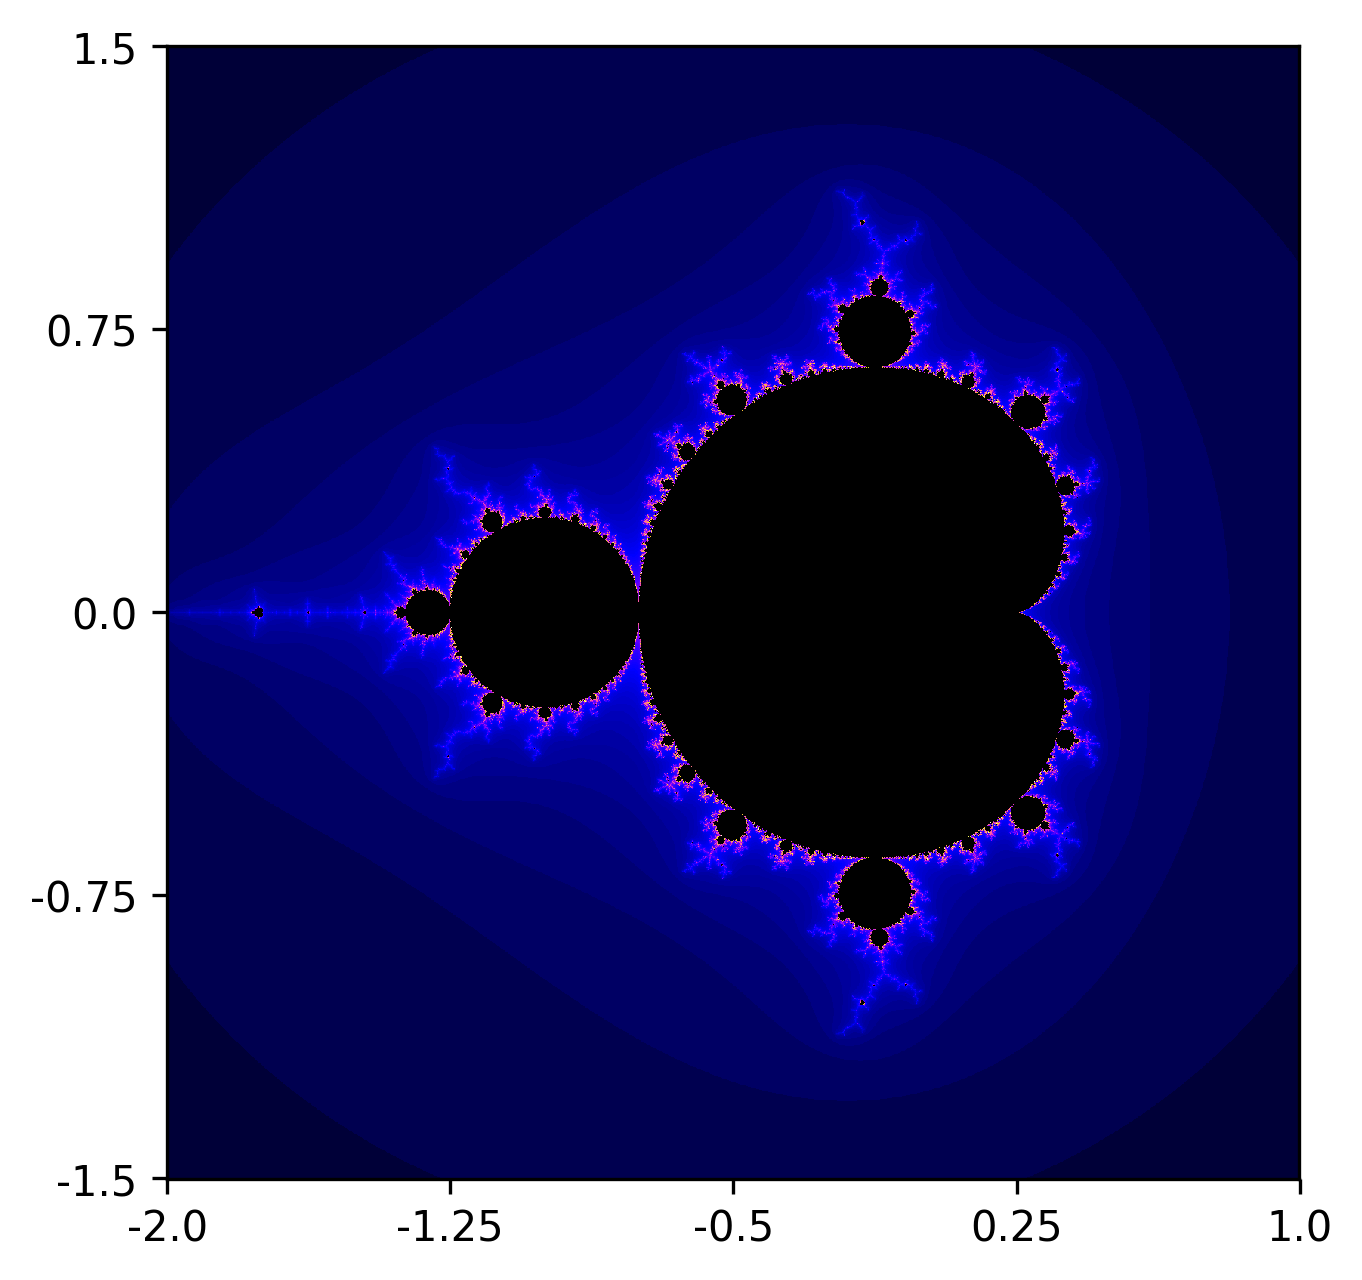

In [11]:
# Plot Mandelbrot Set (with different zoom)
mandelbrot_image(-2, 1, -1.5, 1.5, 5, 5, maxiter = MAXITER, cmap=CMAP)

# mandelbrot_image(-1.5, 0, -0.75, 0.75, 5, 5, maxiter = MAXITER, cmap=CMAP)

# mandelbrot_image(-1.0, -0.5, 0, 0.5, 5, 5, maxiter = MAXITER, cmap=CMAP)

# mandelbrot_image(-0.8, -0.7, 0.2, 0.3, 5, 5, maxiter = MAXITER, cmap=CMAP)

In [4]:
# Estimation of area of mandelbrot set using selected parameter settings
img_width = DPI * 5
img_height = DPI * 5
xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
x,y,z = mandelbrot_set(xmin, xmax, ymin, ymax, img_width, img_height, maxiter = MAXITER)
mandelbrot_pixels = np.sum(z == 0)
mandelbrot_ratio = mandelbrot_pixels / (img_width * img_height)
total_area = abs(xmin - xmax) * abs(ymin - ymax)
mandelbrot_area = mandelbrot_ratio * total_area

print(mandelbrot_pixels, mandelbrot_ratio, mandelbrot_area)

379398 0.16862133333333335 1.517592


Using the parameter settings we have previously defined the best estimation of the area of the mandelbrot set we can make using a hit and miss algorithm is the value of `mandelbrot_area`. 

In [5]:
# Basic hit and miss algorithm
def basic_hit_miss(shots):
    hits = 0
    for s in range(shots): 
        x_random = random.randint(0, img_width-1)
        y_random = random.randint(0, img_height-1)
        if(z[x_random, y_random] == 0): 
            hits += 1
    estimated_area = (hits / shots) * total_area
#     print(estimated_area)
    error = abs(estimated_area - mandelbrot_area)
#     print(error)
    return estimated_area, error

100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


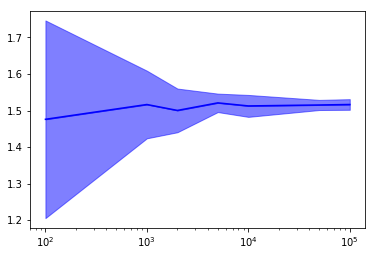

In [51]:
x = [100, 1000, 2000, 5000, 10000, 50000, 100000]
reps = 10
totals = np.zeros((reps, len(x)))
for i in tqdm(range(reps)):
    for j in range(len(x)):
        estimated_area, error = basic_hit_miss(x[j])
        totals[i][j] = estimated_area

mean, std = [], []
for i in range(len(x)):
    mean.append(np.mean(totals[:, i]))
    std.append(np.std(totals[:, i]))
plt.figure()
plt.plot(x, mean, color="blue")
plt.fill_between(x, mean, np.add(mean, std), color="blue", alpha=0.5)
plt.fill_between(x, mean, np.subtract(mean, std), color="blue", alpha=0.5)
# plt.yscale('log')
plt.xscale('log')
plt.show()

100%|██████████| 10/10 [00:30<00:00,  3.08s/it]


[[1.467    1.5471   1.48725  1.52982  1.51839  1.52406  1.520847]
 [1.323    1.4958   1.52055  1.48068  1.54071  1.516662 1.520775]
 [1.485    1.4967   1.52055  1.55376  1.51497  1.52307  1.51938 ]
 [1.485    1.5156   1.46835  1.50048  1.51875  1.50903  1.516086]
 [1.638    1.4994   1.4958   1.51794  1.5102   1.513206 1.515393]]


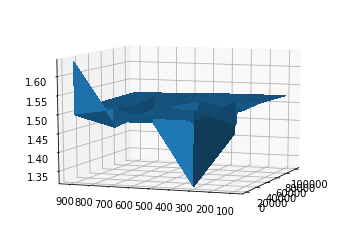

In [18]:
x = [100, 1000, 2000, 5000, 10000, 50000, 100000]
s = [100, 300, 500, 700, 900]
grid = np.meshgrid(x,s)

reps = 10
totals = np.zeros((len(s), len(x)))
for i in tqdm(range(reps)):
    for si in range(len(s)):
#         MAXITER = s[si]
#         DPI = s[si]
#         result = []
        for j in range(len(x)):
            estimated_area, error = basic_hit_miss(x[j])
            totals[si][j] += estimated_area

totals = totals/reps
print(totals)
# totals = np.array(totals)
# mean, std = [], []
# for i in range(len(x)):
#     mean.append(np.mean(totals[:, i]))
#     std.append(np.std(totals[:, i]))
# plt.figure()
# plt.plot(x, mean, color="blue")
# plt.yscale('log')
# plt.show()
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(grid[0], grid[1], totals, linewidth=0, antialiased=False)

ax.view_init(10, 200)

plt.show()

